## Table of Content

### 1. Introduction

- 1.1 Data Description
- 1.2 Features Description
- 1.3 Objective of this project

### 2. Fetching Data

- 2.1 Import necessary Libraries
- 2.2 Import data

### 3.EDA

### 4.Describe the Dataset

### 5. Checking Multicollinearity
### 6. Model Building

- 6.1 Linear Regression
- 6.2 Random Forest Regressor
- 6.3 Gredient Boosting Regressor
- 6.4 KNeighborsRegressor
- 6.5 XGBRegressor
- 6.6 Regularization

### 7. Best Model Selection
### 8. Hyperparameter tuning of selected Model
### 9. Documenting the finding
### 10. Model Save

## 1. Introduction

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.


### 1.1 Data Description
### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics


### 1.2 Feature Description
The Independent Feature columns are:
- Runs R: number of times a player crosses home plate
- At Bats AB: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- Hits: reaching base because of a batted, fair ball without error by the defence
- Doubles: hits on which the batter reaches second base safely without the contribution of a fielding error
- Triples: hits on which the batter reaches third base safely without the contribution of a fielding error
- Homeruns: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
- Walks: times pitching four balls, allowing the batter to take first base / hitter not swinging at four pitches called out of the strike zone and awarded first base.
- Strikeouts: number of batters who received strike three
- Stolen Bases: number of bases advanced by the runner while the ball is in the possession of the defense
- Runs Allowed: the number of runs scored against a pitcher. This includes earned runs and unearned runs.
- Earned Runs: number of runs that did not occur as a result of errors or passed balls
- Earned Run Average (ERA): the average number of earned runs allowed by a pitcher per nine innings
- Shutouts: number of complete games pitched with no runs allowed
- Saves: Number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
- Complete Games: number of games where player was the only pitcher for their team
- Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result
The Target Variable to predict is given in the column:  
 - W: Number of predicted wins


### 1.3 Objective Of this Project

The goal of this machine learning project is to predict the Number of predicted wins.

## 2. Fetching Data:

### 2.1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2.2 Importing Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape

(30, 17)

In [4]:
# Droping Duplicates 
data.drop_duplicates()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
data.shape

(30, 17)

- No duplicates values are present.

In [6]:
# Checking unique values
data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

# 3. EDA

### Checking Null Values

In [7]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

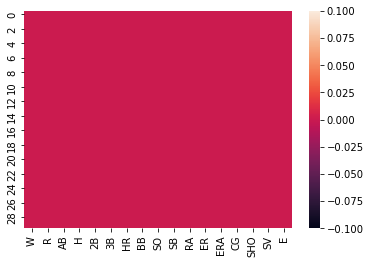

In [8]:
sns.heatmap(data.isnull())

- We can see there is no null values present in dataset.

###  Checking all information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


 - No null value present.
 - Datatype is ok with respect to their column.

## Visualization of the data

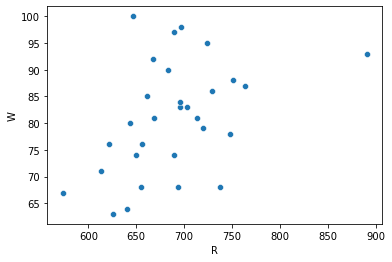

In [10]:
# Sctterplot between runs and wins
sns.scatterplot(x='R',y='W',data=data)
plt.show()

 - As we see, Runs is having a positive linear relationship with wins.
 - Mostly Runs is in the range of 600 to 765.
 - We can also see that one is a outlier with respect to win.

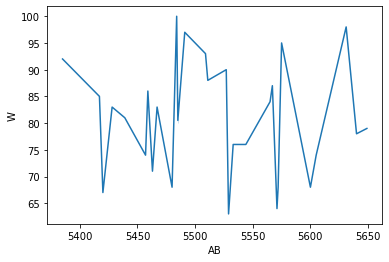

In [11]:
# Line plot b/w AB vs W
sns.lineplot(x='AB',y='W',data=data)
plt.show()

 - We can see, there is no relationship between win and At bat. It is simply showing variance with respect to win. 
 - At Bat 100 is a maximum win and 60 is miminum win.

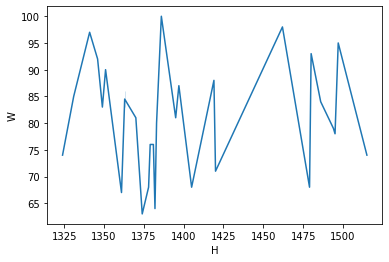

In [12]:
# line plot HomeRuns vs Wins
sns.lineplot(x='H',y='W',data=data)
plt.show()

 - We can see, no linear relationship between win and Hits.
 - At the Hits 1375 has lowest wins i.e. 60.
 - At the Hits 1385 has highest win i.e. 100.

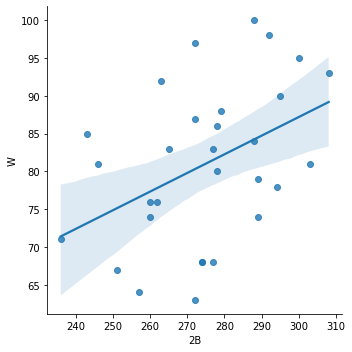

In [13]:
# Lm plot Double vs Wins
sns.lmplot(x='2B',y='W',data=data)
plt.show()

 - We can see, there is little positive linear relationship between wins and double.
 - At the almost 292 double has a maximum wins.
 - At 275 double has minimum win.

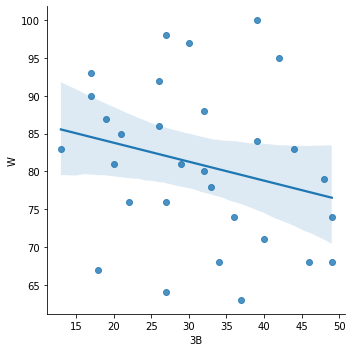

In [14]:
# Lmplot triples vs wins 
sns.lmplot(x='3B',y='W',data=data)
plt.show()

 - As we can see, Triples has negative relationship with win.
 - At Triples 42 has highest wins i.e. 100.
 - At Triples 37 has a lowest wins i.e. 60.

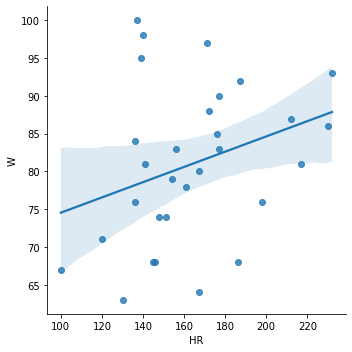

In [15]:
# lmplot Home Runs vs wins
sns.lmplot(x='HR',y='W',data=data)
plt.show()

 - We can see HomeRuns per hit has a positive relation with wins.
 - The maximum wins is in the range of 120 to 185. Where the HomeRuns per hit is maximum with respect to wins.

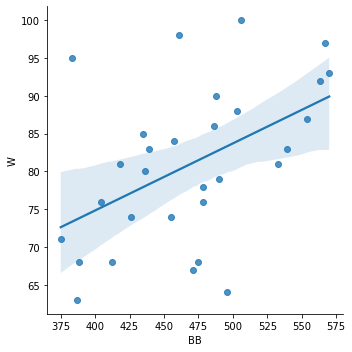

In [16]:
# lmplot Base on Balls vs wins
sns.lmplot(x='BB',y='W',data=data)
plt.show()

- We can see, Base on balls is having positive linear relationship with wins.
- Base on Balls is also called as walk.

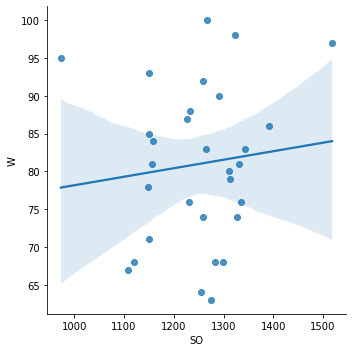

In [17]:
# lmplot Strikeouts vs wins
sns.lmplot(x='SO',y='W',data=data)
plt.show()

 - Strikeouts has little positive relation with wins.
 - We can see, the maximum Strikeouts in the range of 1100 to 1380.

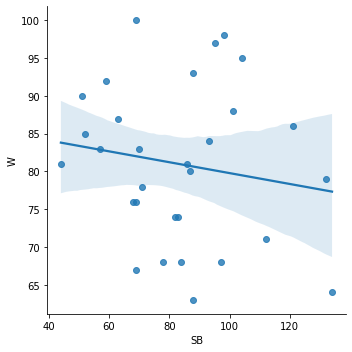

In [18]:
# lmplot Stolen base vs Wins
sns.lmplot(x='SB',y='W',data=data)
plt.show()

 - Stolen bases has a negative relation with wins.
 - The maximum stolen bases is lies in the range of 65 to 110.

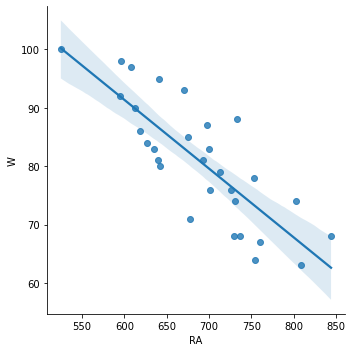

In [19]:
# lmplot Runs allowed vs wins
sns.lmplot(x='RA',y='W',data=data)
plt.show()

 - We can see Runs Allowed has negative linear relationship with wins.

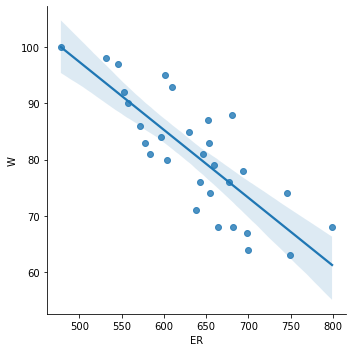

In [20]:
# lmplot Earned runs vs wins
sns.lmplot(x='ER',y='W',data=data)
plt.show()

 - Earned Runs has a negative relationship with wins.
 - As we see wins are increasing then earned runs are decreasing.

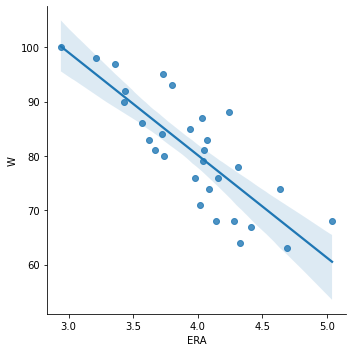

In [21]:
# lmplot earned runs average vs wins
sns.lmplot(x='ERA',y='W',data=data)
plt.show()

- Earned Runs average is having negative relationship with wins.
- Wins are incresing then earned runs average is decreasing.

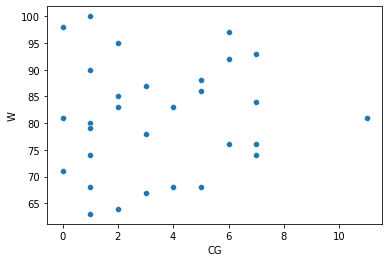

In [22]:
# scatterplot complete game vs wins
sns.scatterplot(x='CG',y='W',data=data)
plt.show()

 - Maximum wins is lies in the range of 0 to 7 of Complete game.

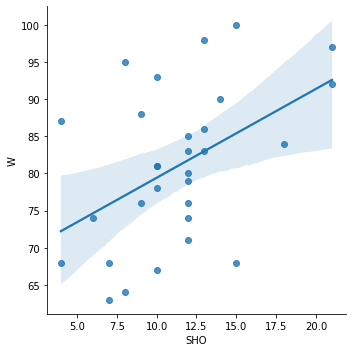

In [23]:
# lmplot shutouts vs wins
sns.lmplot(x='SHO',y='W',data=data)
plt.show()

 - As we can see, shutouts has a positive relatinship with wins.
 - Maximum wins is lies in the range of 7.5 to 15.0 of a shutouts.

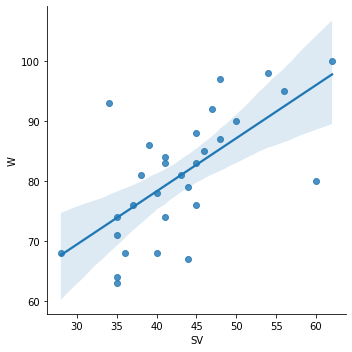

In [24]:
# lmplot save vs wins
sns.lmplot(x='SV',y='W',data=data)
plt.show()

 - Save has a positive ralationship with win.
 - Maximum wins is lies in the range of 35 to 50 of save.

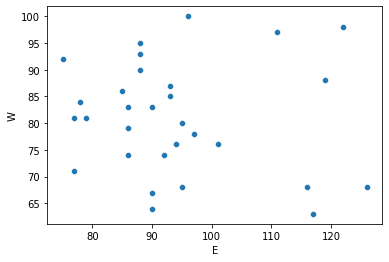

In [25]:
# scatterplot Error vs wins
sns.scatterplot(x='E',y='W',data=data)
plt.show()

 - Maximum wins is lies in the range of 78 to 100 of error.

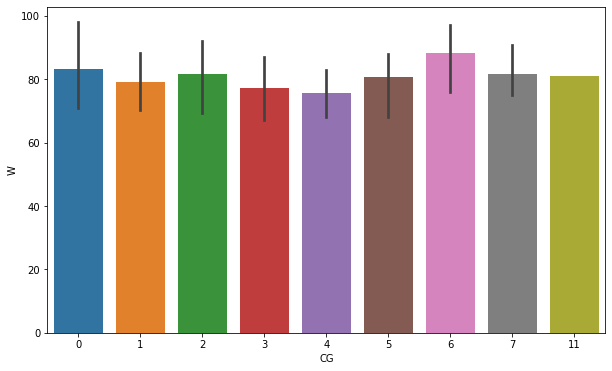

In [26]:
# barplot complete game vs wins
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="CG",y="W",data=df_good)
plt.show()

 - We can see, complete game 6 is having highest wins ans complete game 4 is having minimum wins.
 - But We can observed that all are in same range.

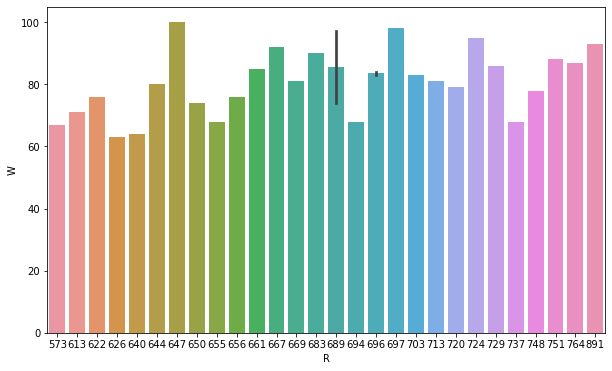

In [27]:
# Barplot Runs vs Wins
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="R",y="W",data=df_good)
plt.show()

 - We can see, Runs 647 has maximum wins ans runs 626 has minimum wins.
 - The wins is equally distributed upto the 626 runs.

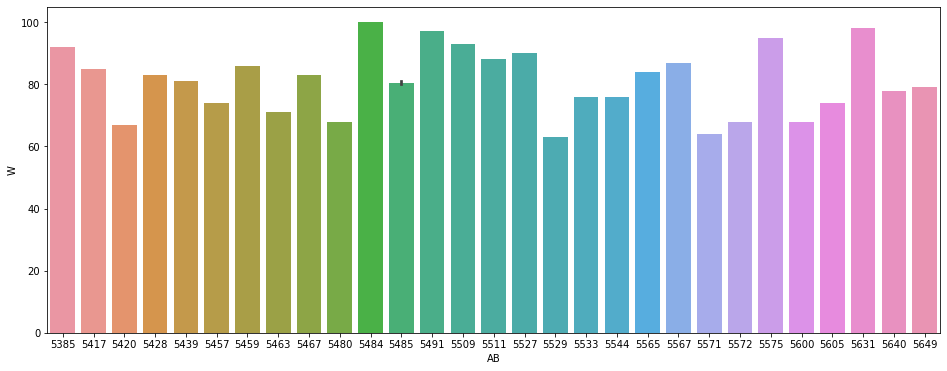

In [28]:
# Barplot At Bats vs wins
plt.figure(figsize=(16,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="AB",y="W",data=df_good)
plt.show()

- The maximum wins are in the At bats 5480 and minimum win are in At Bats 5529.
- Upto 62 wins tha all At Bats are equally distributed.

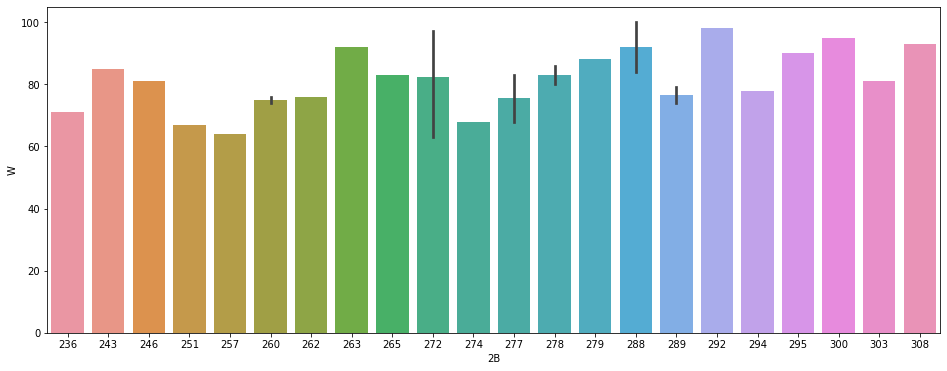

In [29]:
# Barplot Double vs wins
plt.figure(figsize=(16,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="2B",y="W",data=df_good)
plt.show()

- The double has won maximum at 292 and double has minimum won in the 274.
- Upto the 63 wins the all double are equally distributed.

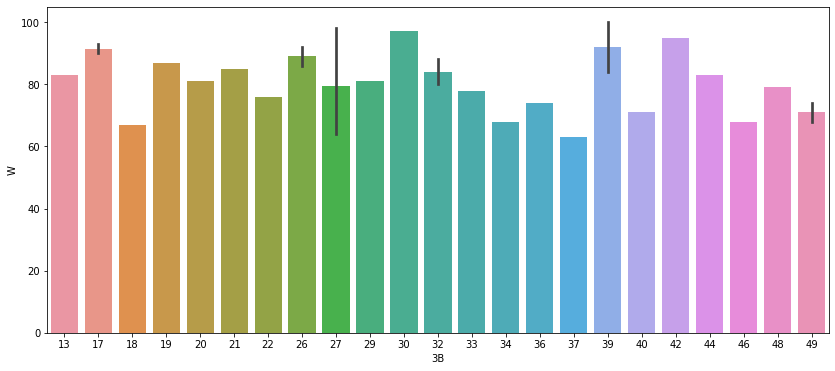

In [30]:
# barplot triples vs wins
plt.figure(figsize=(14,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="3B",y="W",data=df_good)
plt.show()

- Triples 30 has maximum wins and triples 37 has minimum wins.
- All triples is equally distributed upto the 62 wins.

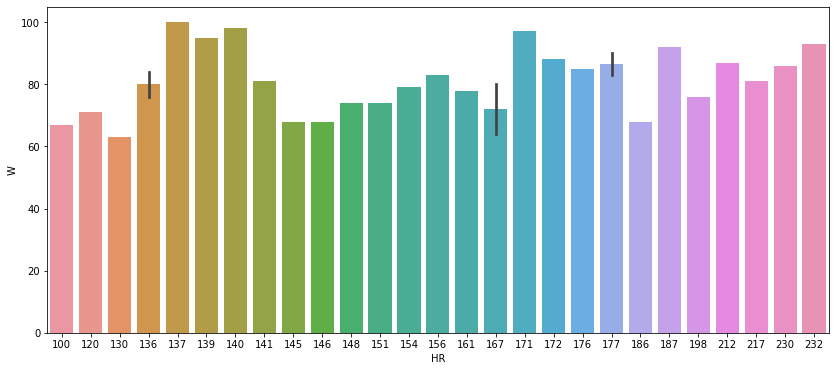

In [31]:
# Barplot HomeRuns vs Wins
plt.figure(figsize=(14,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="HR",y="W",data=df_good,)
plt.show()

 - As we can see, Homeruns per hits is high with respect to win at the 137 followed by 140, 171, and 139.
 - Homeruns per hits is low at 130 followed by 186.
 - Homeruns per hits is equally distributed upto 61 wins.

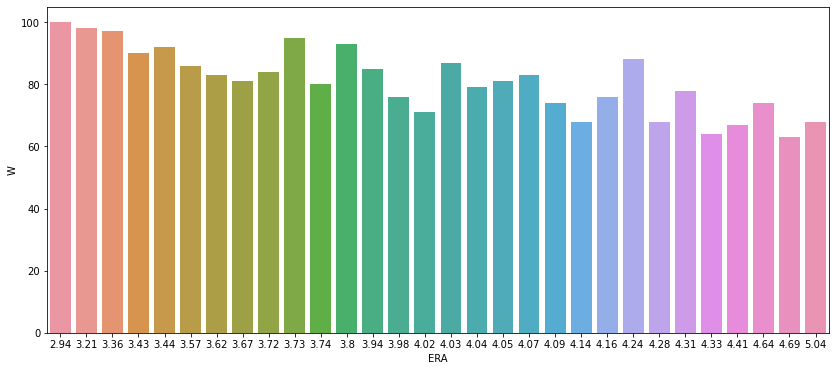

In [32]:
# Barplot Earned Runs Average vs Wins
plt.figure(figsize=(14,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="ERA",y="W",data=df_good,)
plt.show()

- At 2.94 has a highest Earned runs average with respect to win followed by 3.21, and 3.36.
- At 4.14 has lowest earned runs average with respect to wins followed by 4.69.

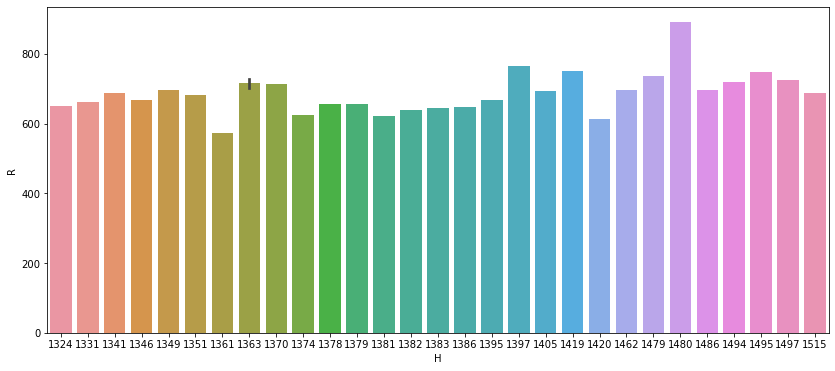

In [33]:
# bar plot Hits vs Runs
plt.figure(figsize=(14,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="H",y="R",data=df_good,)
plt.show()

- At the hits of 1480 has highest runs and at the hits 1361 has lowest runs.
- Upto 570 hits are equally distributed with respect to runs.

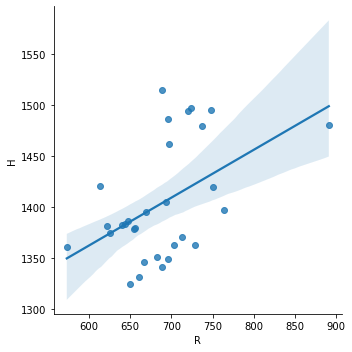

In [34]:
# lmplot Runs vs hits
sns.lmplot(x='R',y='H',data=data)
plt.show()

- We can see the Hits and runs is having positive linear relationship.

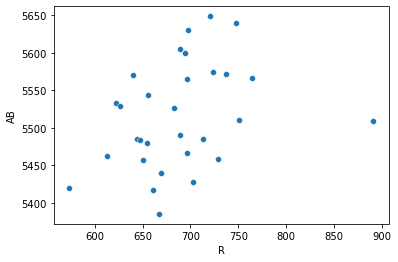

In [35]:
# scatterplot Runs vs Double
sns.scatterplot(x='R',y='AB',data=data)
plt.show()

 - We can see, At bats has positive linear relationship with runs.
 - 620 to 760 at this range, the at bats is lies maximum. 

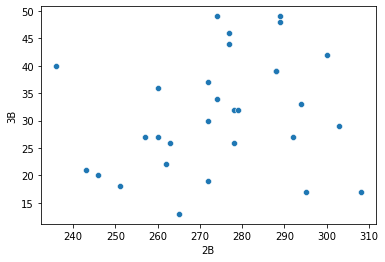

In [36]:
# Scatterplot Dooble vs Triples
sns.scatterplot(x='2B',y='3B',data=data)
plt.show()

- We can see, there is little relationship between double and triples.

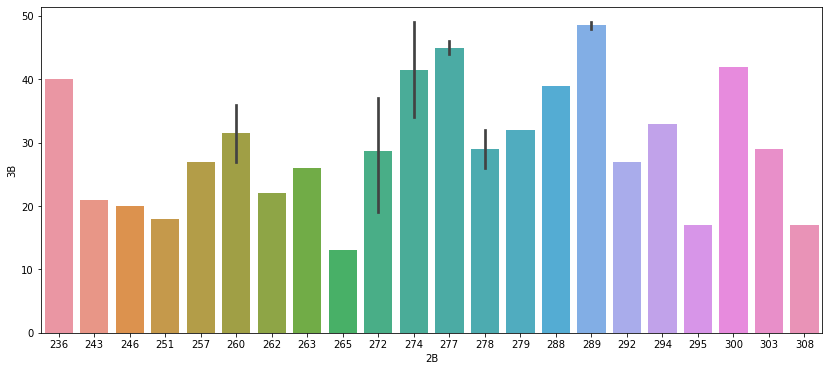

In [37]:
# BArplot Double vs Triples
plt.figure(figsize=(14,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="2B",y="3B",data=df_good)
plt.show()

 - As we can see, double 289 has maximum triples followed by 277 and 300.
 - 2B 265 has minimum triples followed by 295 and 251.

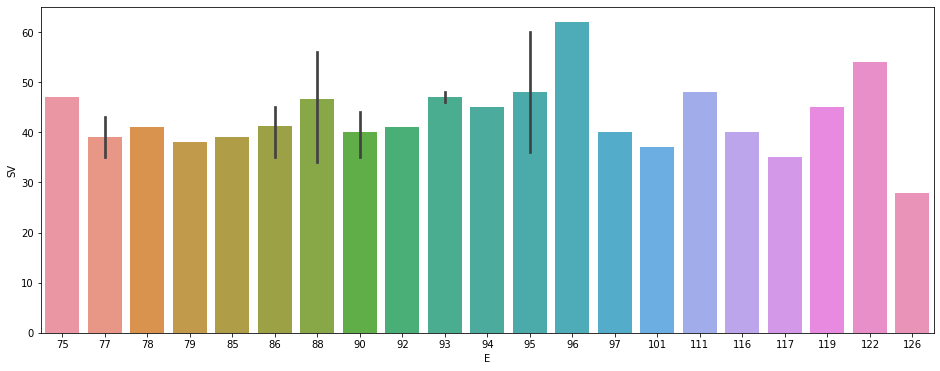

In [38]:
# Barplot Error vs Save
plt.figure(figsize=(16,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="E",y="SV",data=df_good)
plt.show()

 - Error 96 has a maximum save followed by 122.
 - Save upto 38 error is equally distributed.

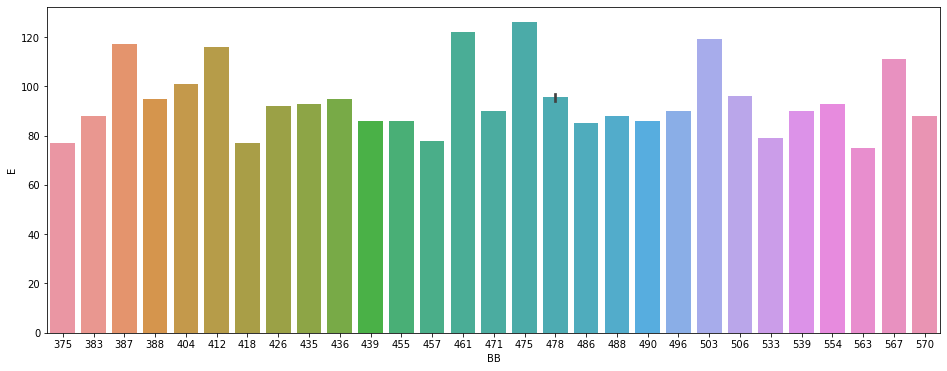

In [39]:
# Barplot Base on Balls vs Error
plt.figure(figsize=(16,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="BB",y="E",data=df_good)
plt.show()

- Base on Balls at 475 has maximum error followed by 461 and 503.
- Base on Balls at 375 has minimum error followed by 418 and 563.

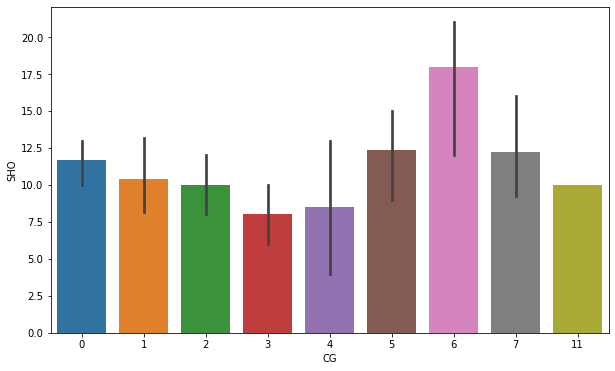

In [40]:
# Barplot Shutouts vs complete game
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="CG",y="SHO",data=df_good)
plt.show()

- We can see, complete game 6 has a maximum Shutouts followed by 5 and 6.
- Complete game 3 has minimum shutouts followed by 4.
- Upto 7.2 SHO, all CG are equally distributed.

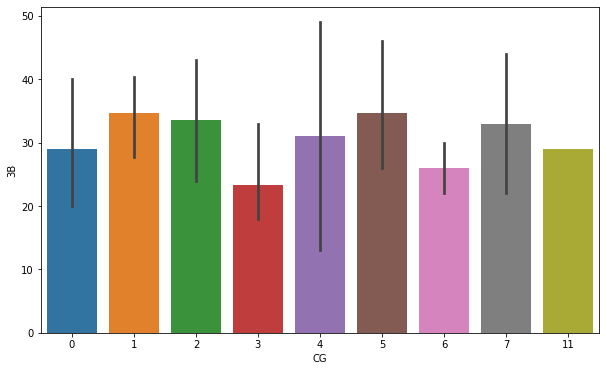

In [41]:
# Barplot Triples vs complete game
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="W",ascending=False)
sns.barplot(x="CG",y="3B",data=df_good)
plt.show()

- We can see, CG 1 has maximum triples followed by 5 and 2.
- CG 3 has minimum triples followed by 6.
- Upto 24 Triples all CG are equally distributed.

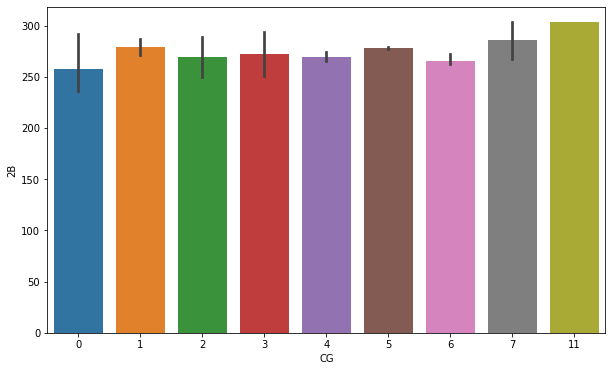

In [42]:
# Barplot Doubles vs complete game
plt.figure(figsize=(10,6))
sns.barplot(x="CG",y="2B",data=data)
plt.show()

 - Upto 250 Doubles, all CG are equally distributed.
 - CG 11 has maximum doubles then 7 and 1.
 - CG 0 has minimum doubles.

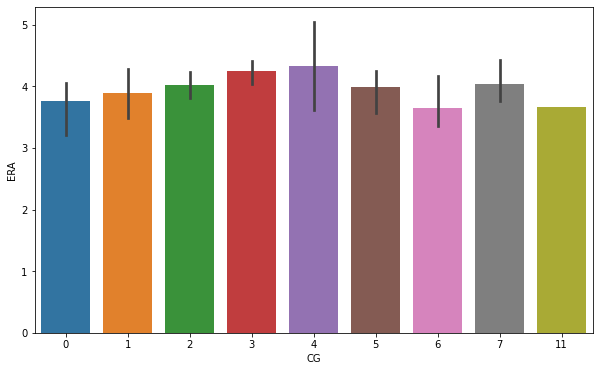

In [43]:
# Barplot Earned Runs Average vs complete game
plt.figure(figsize=(10,6))
sns.barplot(x="CG",y="ERA",data=data)
plt.show()

 - Upto 3.6 Earned Runs Average, all CG are equally distributed.
 - CG 4 has maximum earned runs average then 3 and CG 6 has minimum earned runs average.

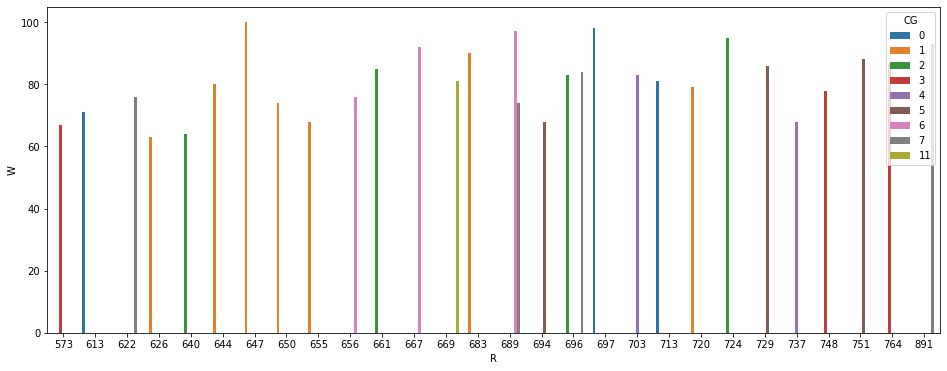

In [44]:
# Comparision two variables
plt.figure(figsize=(16,6))
sns.barplot(x="R",y='W',data=data,hue='CG')
plt.show()

 - In this complete gane 4 has a maximum wins and their runs also maximum followed by cg 4.
 - We can see CG 11 has low wins and their runs also low.

<AxesSubplot:xlabel='CG', ylabel='count'>

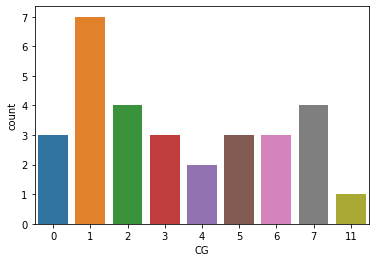

In [45]:
sns.countplot(x='CG',data=data)

 - We can see, complete game 1 has maximum count followed by 2 and 7.
 - complete game 11 has lowest count followed by 4.

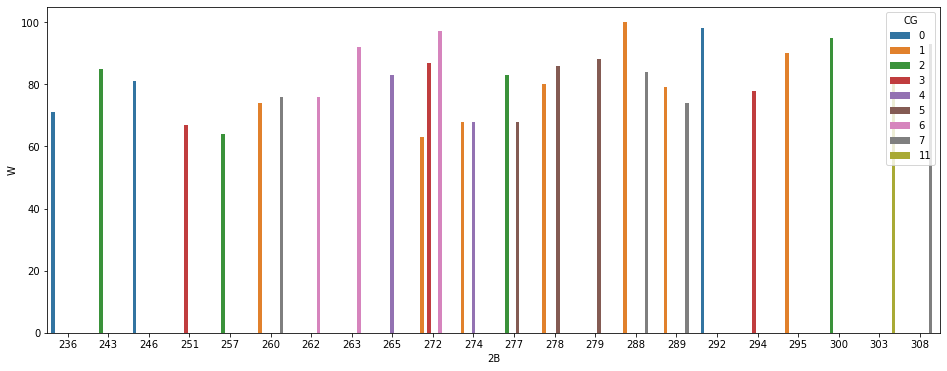

In [46]:
# Comparision two variables
plt.figure(figsize=(16,6))
sns.barplot(x="2B",y='W',data=data,hue='CG')
plt.show()

 - In this, CG 1 has won maximum double followed by 2.
 - From 272 to 295 in this range,CG 1 have a highest chance to wins doubles. 

In [47]:
cg = data.groupby('CG')['W'].sum()
cg

CG
0     250
1     554
2     327
3     232
4     151
5     242
6     265
7     327
11     81
Name: W, dtype: int64

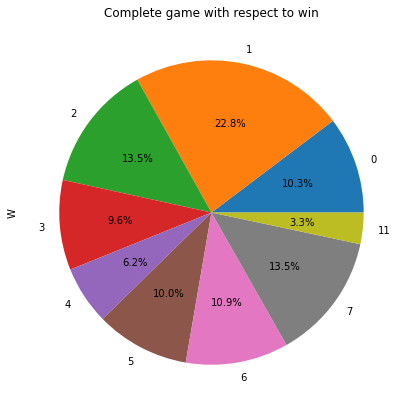

In [48]:
plt.figure(figsize=(10,7))
cg.plot.pie(autopct = '%1.1f%%')
plt.title('Complete game with respect to win')
plt.show()

 - We can see, CG 1 has maximium 22.8% chance to won the game then CG 2, and CG 3.
 - But CG 11 has lowest chance to won the game.

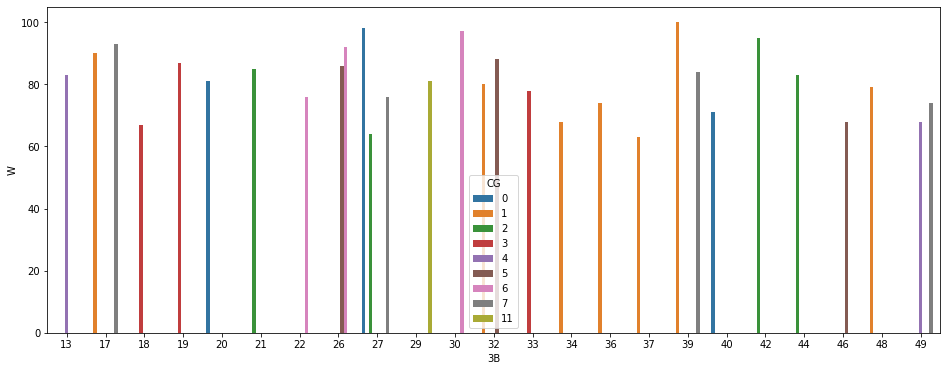

In [49]:
# Comparision two variables
plt.figure(figsize=(16,6))
sns.barplot(x="3B",y='W',data=data,hue='CG')
plt.show()

 - CG 1 is having highest wins then 2.
 - From 32 to 39 in this range,CG 1 have a highest chance to wins triples.

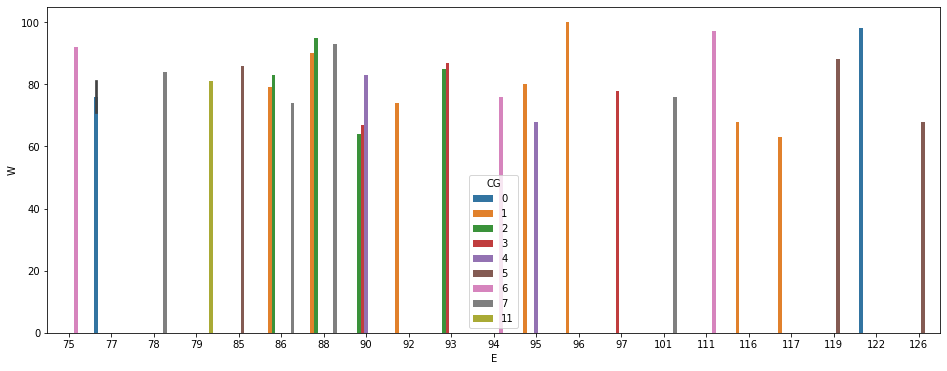

In [50]:
# Comparision two variables
plt.figure(figsize=(16,6))
sns.barplot(x="E",y='W',data=data,hue='CG')
plt.show()

 - we can see, CG 1 has made highest error then CG 2.
 - from 86 to 117 in this range, CG 1 have a highest chance to made error but the chance of win also high.

<AxesSubplot:xlabel='2B', ylabel='count'>

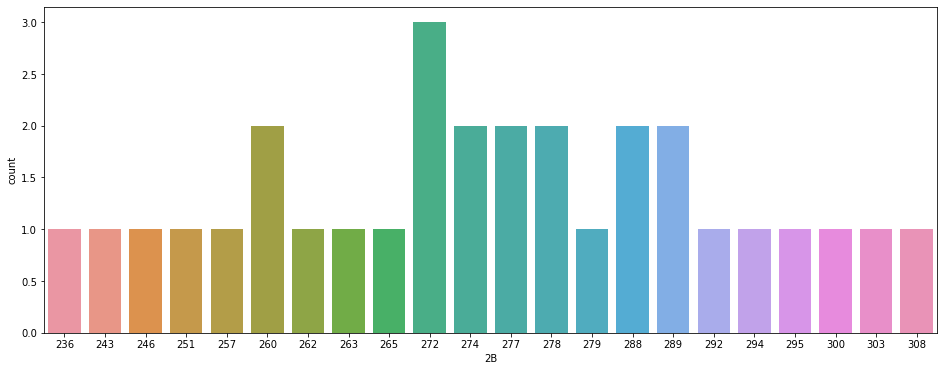

In [51]:
plt.figure(figsize=(16,6))
sns.countplot(x='2B',data=data)

- 272 maximum double is played.

<AxesSubplot:xlabel='3B', ylabel='count'>

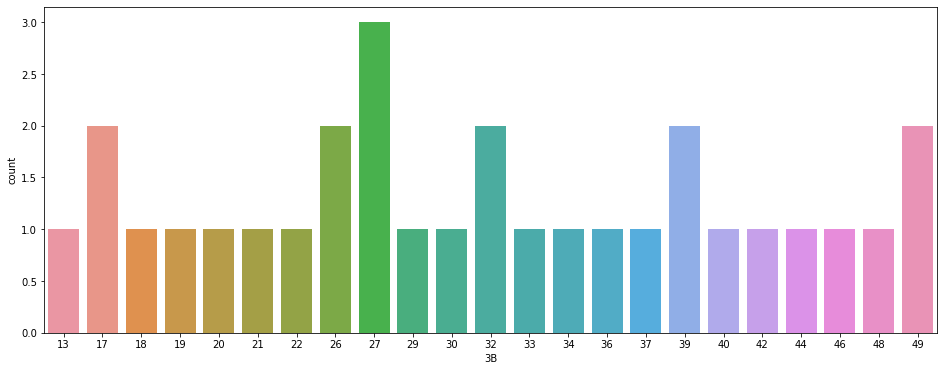

In [52]:
plt.figure(figsize=(16,6))
sns.countplot(x='3B',data=data)

 - 27 has played maximum triple.
 - upto 1 all are equally distributed.

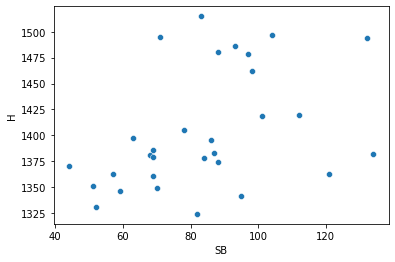

In [53]:
# Scatterplot Stolen Bases Vs Hits
sns.scatterplot(x='SB',y='H',data=data)
plt.show()

 - We can see, Stolen Bases has positive linear relationship with Hits.

## 4. Describe the Dataset

In [54]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Outcome of describe of datasets:

 - mean and 50% of all columns are similar. difference between 75% and max in columns like E,SV,SHO,SB etc is considerable indicating presence of outliers.

## Correlation of the features with target column

In [55]:
data.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

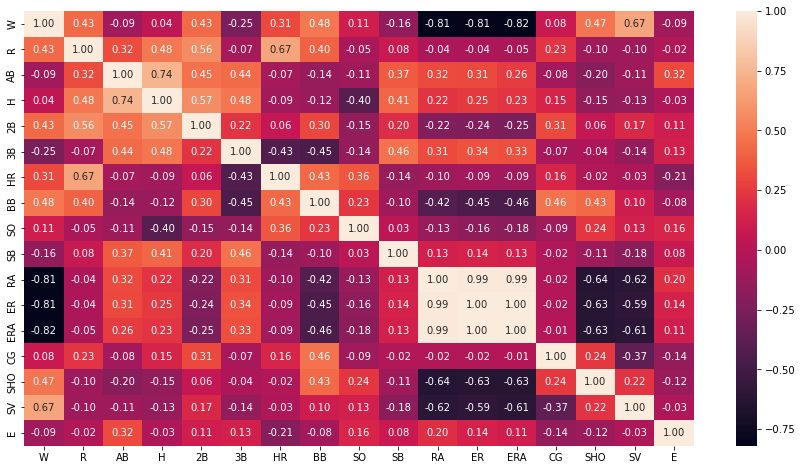

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation:

  1. Runs has 43% positive correlation with the target column.
  2. At Bats has 9% negative correlation with the target column.
  3. Hist has 4% positive correlation with the target column.
  4. Double has 43% positive correlation with the target column.
  5. Triple has 25% negative correlation with target column.
  6. HomeRuns has 31% positive correlation with target column.
  7. Base on Balls has 48% positive correlation with target column.
  8. Strikeouts has 11% positive correlation with target column.
  9. Stolen Bases has 16% negative correlation with target column.
  10. Runs Allowed has 81% negative correlation with target column.
  11. Earned Runs has 81% negative correlation with target column.
  12. Earned Run Average has 82% negative correlation with target column.
  13. Complete Game has 8% positive correlation with target column.
  14. Shutouts has 47% positive correlation with target column.
  15. Save has 67% positive correlation with target column.
  16. Error has 8% negative correlation with target column.
 
### Features Correlation:-

  1. At Bats has 74% positive correlation with the Hits.
  2. Runs has 67% positive correlation with the HomeRuns.
  3. Hist has 57% positive correlation with the doubles.
  4. Runs Allowed has 64% negative correlation with the Shutouts.
  5. Runs Allowed has 99% positive correlation with ERA and ER.
  6. Save has 62% negative correlation with Runs Allowed.
  

### Checking linear relation of above feature

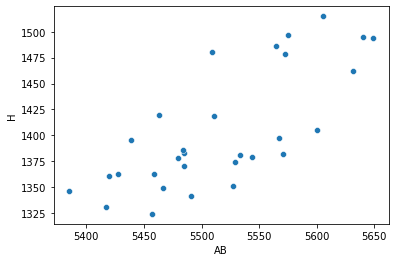

In [57]:
sns.scatterplot(x='AB',y='H',data=data)
plt.show()

 - We can see, At Bats is having linear relationship with hits.
 - So i will drop one of the feature.

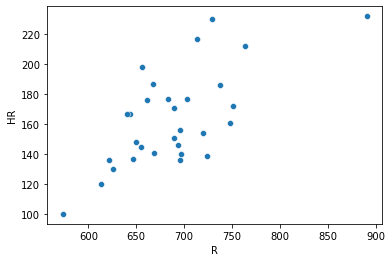

In [58]:
sns.scatterplot(x='R',y='HR',data=data)
plt.show()

 - Runs also have a linear relation with HomeRuns, So i will drop one of these features.

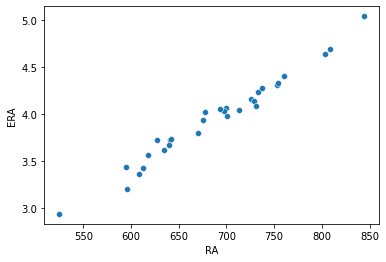

In [59]:
sns.scatterplot(x='RA',y='ERA',data=data)
plt.show()

- We can see, Runs Allowed have a linear relation with Earned Run Average so i will drop one of the features.

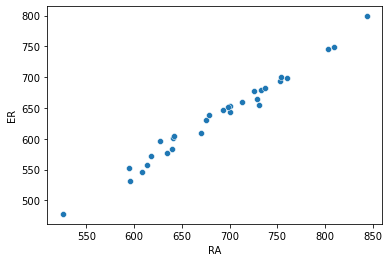

In [60]:
sns.scatterplot(x='RA',y='ER',data=data)
plt.show()

 - We can see, Both feature is having linear relationship with each other so i will drop one of the feature.

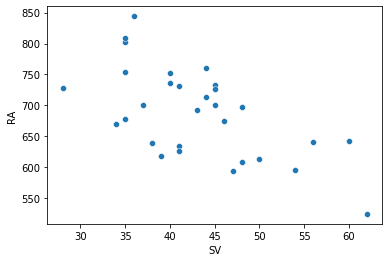

In [61]:
sns.scatterplot(x='SV',y='RA',data=data)
plt.show()

- We can see, Runs Allowed have a negative relationship with save. So, I will drop one of the feature.

## Visualizing correlation of feature columns with label column.

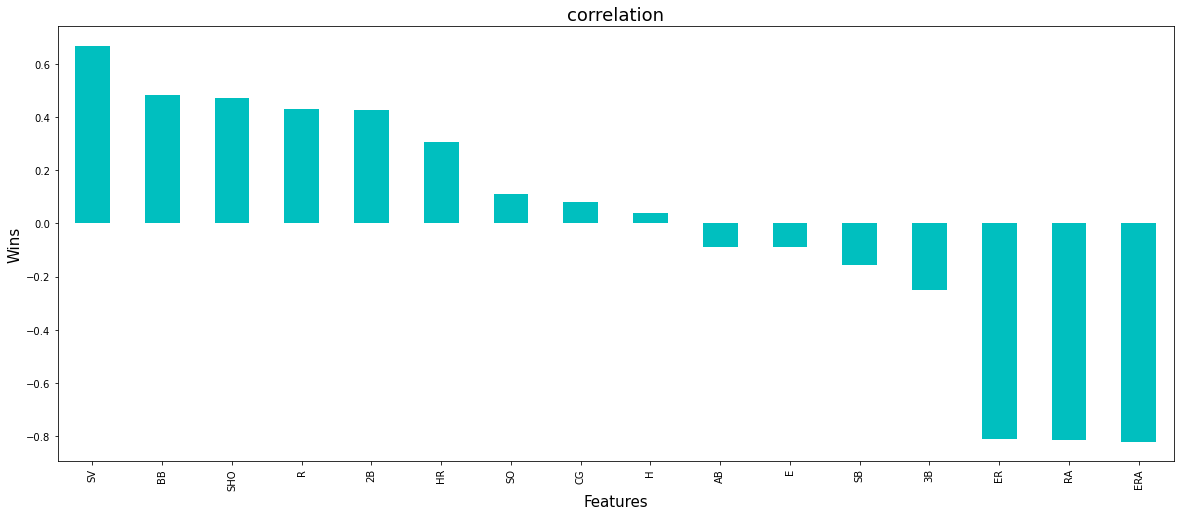

In [62]:
plt.figure(figsize = (20,8))
data.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

 - It is observed that Save, Base on Balls and Shutouts have the highest positive correlation with Wins, while Earned Run Average, Runs Allowed and Earned Runs have the highest negative correlation with Wins.

## Checking Distribution of data

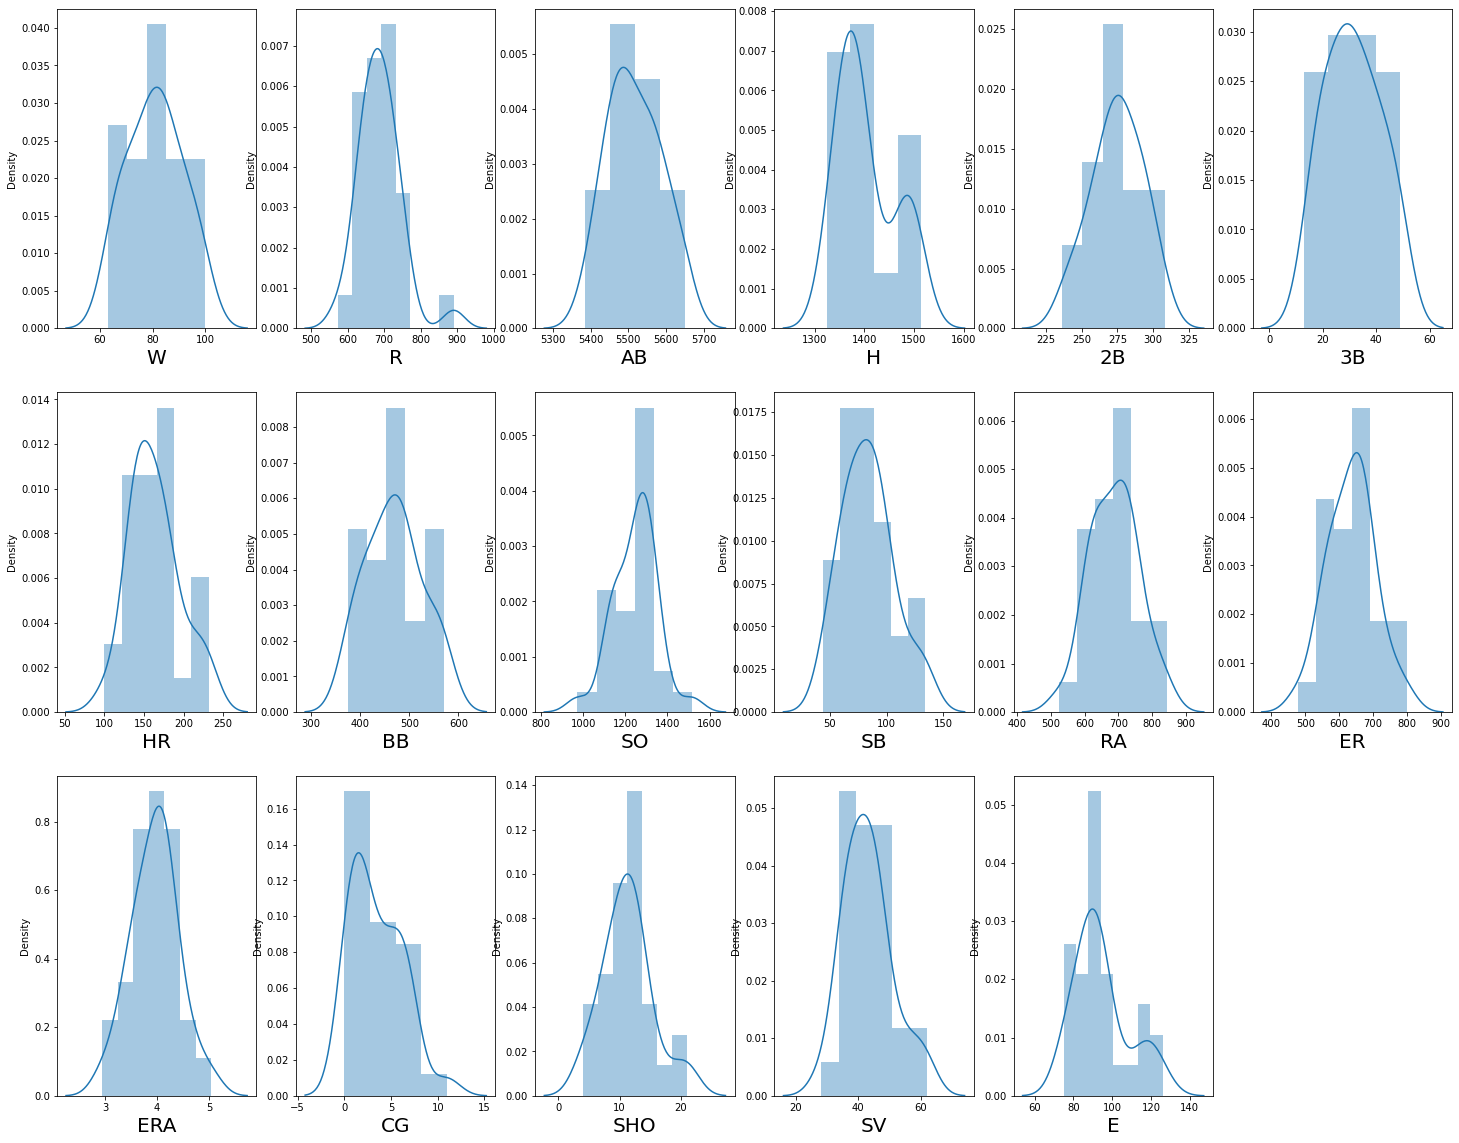

In [63]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=18:
        ax = plt.subplot(3,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

 - We can see, Almost all features are having normal distribution except CG, E, SHO, SV and SO.
 - CG, E, SHO, SV and SO in this features there is some skewness is present.
 - CG, E, SB, ER, H and R are having positive skewness.
 - SO, 2B are having negative skewness.

In [64]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

 - Outcome of the skewness: Skewness threshold is taken is +/-0.65.
 - R, H, CG, and E are having some skewness.
 - Rest of all are ok with threshold.

## Checking Outliers

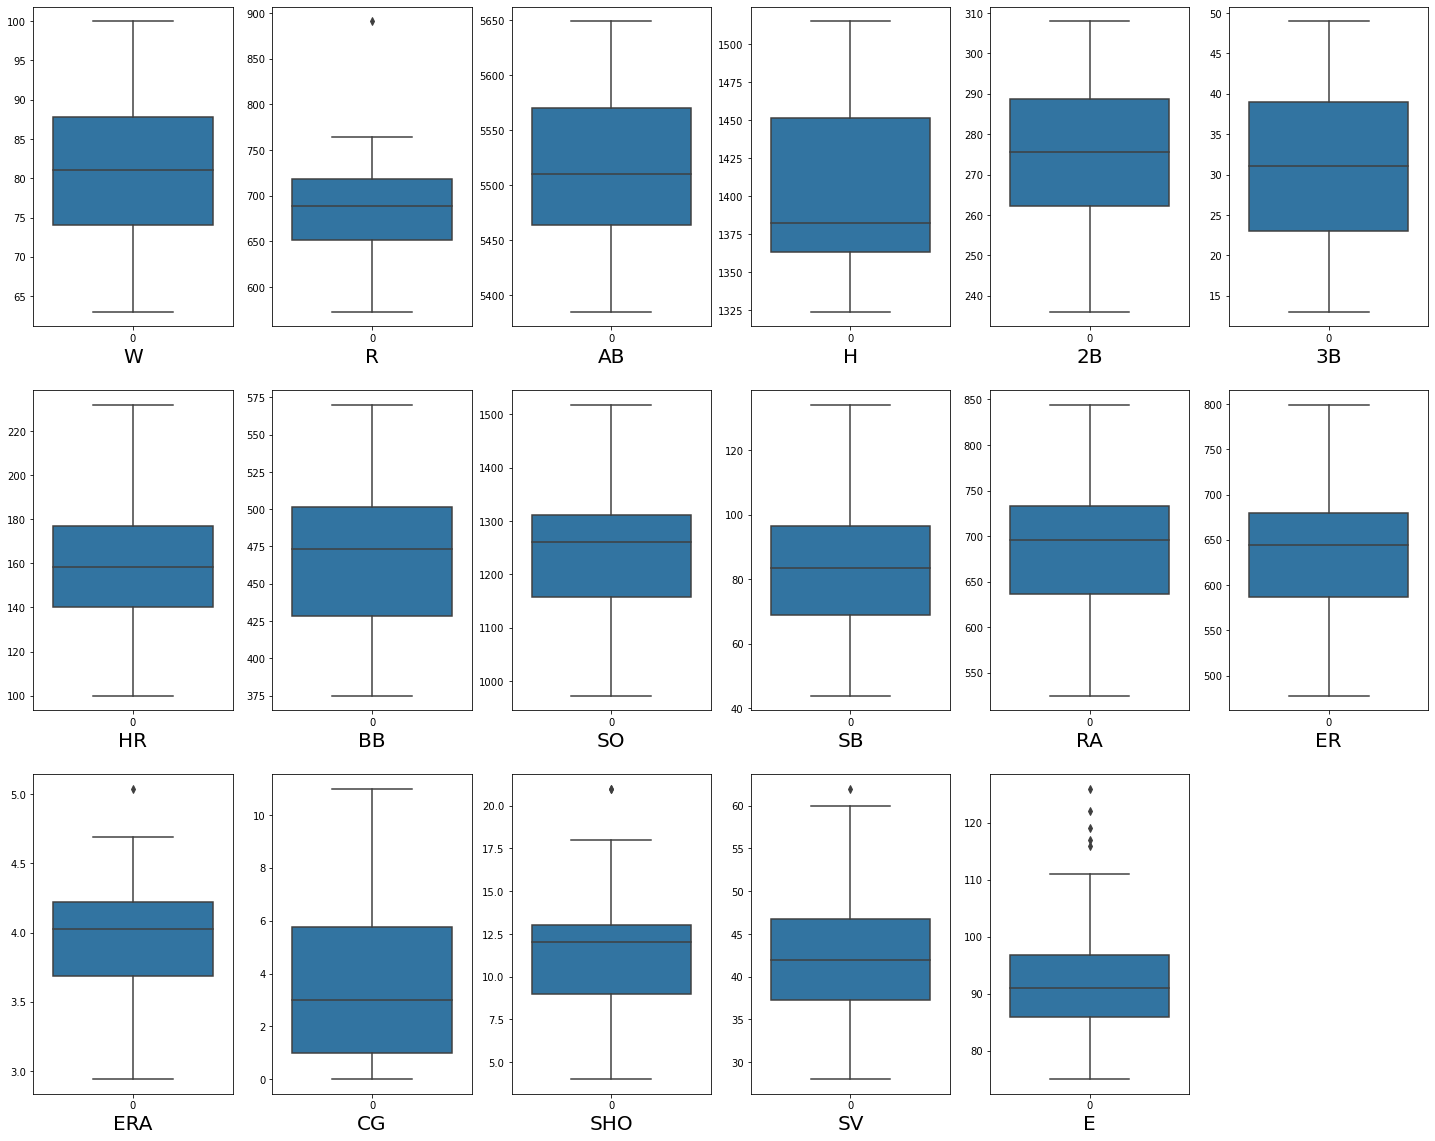

In [65]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=18:
        plt.subplot(3,6,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- We can see, R, ERA, SHO, SV and E are having some outliers.
- But in E, there is lots of outliers are present.

### Removing Outliers

In [66]:
from scipy.stats import zscore

z_score = zscore(data[['R','ERA','SHO','SV','E']])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]


In [67]:
df.shape

(29, 17)

### Percentage of data loss

In [68]:
data_loss = ((30 - 29)/30*100)
print(data_loss,'%')

3.3333333333333335 %


####  Data skewness before removing

In [69]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

####  Data skewness after removing

In [70]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

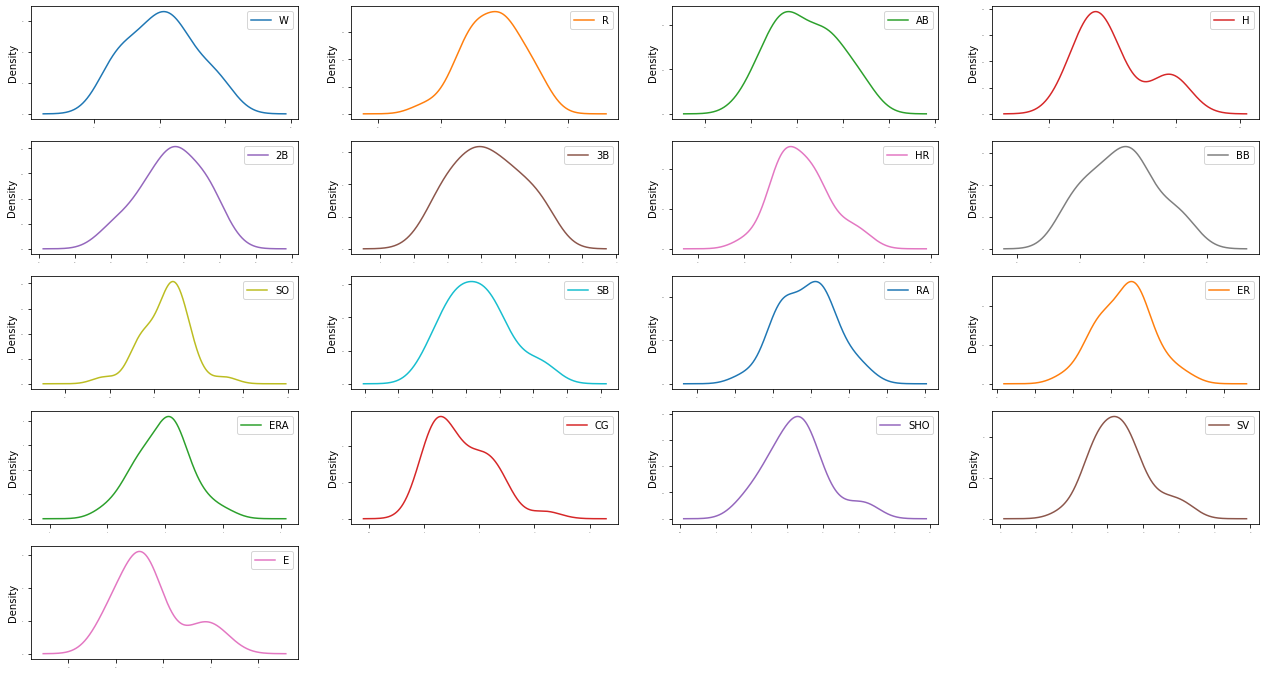

In [71]:
df.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(22,12))
plt.show()

- We can see, data is nornally distributed after removing skewness.

## 5. Checking Multicollinearity

In [72]:
x = df.drop(columns=['W'],axis=1)
y = df['W']

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = pd.DataFrame()

In [77]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,R,7.229564
1,AB,18.333377
2,H,10.558458
3,2B,3.743423
4,3B,3.278636
5,HR,8.426403
6,BB,3.431971
7,SO,2.720640
8,SB,2.110804
9,RA,197.315706


- ERA, ER, RA, H and AB VIF values greter than 10. Here I considered 10 for comparing VIF values. 
- If VIF > 10, It means multicollinearity is present. 
- MultiCollinearity exists ERA, ER, RA, H and AB features, Based on ANOVA F scores.
- Those features is having lowest correlation with target column that feature will be dropped.

In [78]:
# Dropping ER, ERA, RA, AB features

ddf = df.drop(columns=['ER','ERA','RA','AB'],axis=1)

In [79]:
ddf.head()

,W,R,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,1515,289,49,151,455,1259,83,7,12,35,86


In [80]:
x = ddf.drop(columns=['W'],axis=1)
y = ddf['W']

In [81]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [82]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 9.62543504e-01,  1.65963137e+00,  1.68518793e+00,
         1.00615029e+00, -7.41927000e-01, -1.60519802e+00,
        -2.55061247e+00,  9.36131648e-01, -3.07098204e-01,
        -7.87002186e-01,  1.53275292e+00, -3.48265262e-01],
       [ 2.98863300e-01, -9.59650790e-01,  1.38197902e-01,
         1.18522654e+00, -1.09958425e-01, -4.62095966e-01,
         9.36832915e-02, -5.16377335e-01, -3.07098204e-01,
         2.36736538e-01,  3.12020186e-01, -5.40819806e-01],
       [-3.12105130e-01,  2.25800186e-02,  1.90738550e+00,
        -2.28819392e-01, -6.64354121e-01,  1.23209786e+00,
        -9.35611465e-01,  2.25038365e-01,  2.01131531e+00,
        -2.52844176e-01, -6.64136739e-01, -1.32612477e+00],
       [-1.30829774e+00, -3.04830251e-01, -8.37664770e-01,
        -4.32227907e-01, -8.60039342e-01, -1.16272085e+00,
        -2.30682707e-01, -6.18421529e-01,  1.26446344e+00,
        -5.13554932e-01, -8.20688859e-01,  6.50818351e-01],
       [ 1.37737301e-01,  1.87790488e+00,  9.1143479

# 6. Model Building

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## 6.1 Linear Regression

In [84]:
lr = LinearRegression()

In [85]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8776180727441499 on Random State 986


In [86]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=986)

In [87]:
regressors = {
    'Linear Regression' : LinearRegression(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [88]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,3.056,11.516,3.393522,0.878


### Cross - Validation of the model

In [89]:
y_pred = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [90]:
for j in range(4,10):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- -13.305113177124031
accuracy_score is:- 86.8132006266369


At cv:- 5
Cross validation score is:- -17.437588838983054
accuracy_score is:- 86.8132006266369


At cv:- 6
Cross validation score is:- -29.290777831142446
accuracy_score is:- 86.8132006266369


At cv:- 7
Cross validation score is:- -51.156606578465734
accuracy_score is:- 86.8132006266369


At cv:- 8
Cross validation score is:- -34.444947898234325
accuracy_score is:- 86.8132006266369


At cv:- 9
Cross validation score is:- -1914.2079024035113
accuracy_score is:- 86.8132006266369




In [91]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  -0.1330511317712403 
The accuracy score is:  0.868132006266369


## 6.2 RandomForest Regressor

In [92]:
rf = RandomForestRegressor()

In [93]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8129442404006675 on Random State 599


In [94]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=599)

In [95]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [96]:
results

,MAE,MSE,RMSE,R2-score
Random Forest,2.702,12.298,3.506898,0.834


### Cross - Validation of the model

In [97]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [98]:
for j in range(4,10):
    isscore = cross_val_score(rf,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 39.670626838237425
accuracy_score is:- 81.49524874791322


At cv:- 5
Cross validation score is:- -50.51847325666727
accuracy_score is:- 81.49524874791322


At cv:- 6
Cross validation score is:- 4.130957584661754
accuracy_score is:- 81.49524874791322


At cv:- 7
Cross validation score is:- -17.379194698803463
accuracy_score is:- 81.49524874791322


At cv:- 8
Cross validation score is:- -18.11968350077865
accuracy_score is:- 81.49524874791322


At cv:- 9
Cross validation score is:- -1776.7702442586797
accuracy_score is:- 81.49524874791322




In [99]:
lsscore_selected = cross_val_score(rf,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.48433366058449084 
The accuracy score is:  0.8149524874791322


## 6.3 Gradient Boosting Regressor

In [100]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8620626932394133 on Random State 314


In [101]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=314)

In [102]:
regressors = {
    
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [103]:
results

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,3.298,13.251,3.640175,0.881


### Cross-validation of the model

In [104]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [105]:
for j in range(4,10):
    isscore = cross_val_score(gbr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 22.81851556032027
accuracy_score is:- 87.43730557515346


At cv:- 5
Cross validation score is:- -70.56944716304257
accuracy_score is:- 87.43730557515346


At cv:- 6
Cross validation score is:- -55.10404467901617
accuracy_score is:- 87.43730557515346


At cv:- 7
Cross validation score is:- -73.51686680175307
accuracy_score is:- 87.43730557515346


At cv:- 8
Cross validation score is:- -48.47604865947698
accuracy_score is:- 87.43730557515346


At cv:- 9
Cross validation score is:- -1200.6038297152384
accuracy_score is:- 87.43730557515346




In [106]:
lsscore_selected = cross_val_score(gbr,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.17766730824616558 
The accuracy score is:  0.8743730557515346


## 6.4 KNeighbors Regressor

In [107]:
from sklearn.neighbors import KNeighborsRegressor

In [108]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8113944223107568 on Random State 436


In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=436)

In [110]:
regressors = {
    
    'KNN Regressor': KNeighborsRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [111]:
results

,MAE,MSE,RMSE,R2-score
KNN Regressor,2.578,9.351,3.057959,0.811


### Cross-validation of the model

In [112]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [113]:
for j in range(4,10):
    isscore = cross_val_score(knn,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 28.56065302928418
accuracy_score is:- 81.13944223107568


At cv:- 5
Cross validation score is:- -10.967216000851813
accuracy_score is:- 81.13944223107568


At cv:- 6
Cross validation score is:- 13.671926381552838
accuracy_score is:- 81.13944223107568


At cv:- 7
Cross validation score is:- -7.363589793607114
accuracy_score is:- 81.13944223107568


At cv:- 8
Cross validation score is:- -21.510279528108676
accuracy_score is:- 81.13944223107568


At cv:- 9
Cross validation score is:- -2348.256384534432
accuracy_score is:- 81.13944223107568




In [114]:
lsscore_selected = cross_val_score(knn,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.2856065302928418 
The accuracy score is:  0.8113944223107568


## 6.5 XGBRegressor

In [115]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8642944805061809 on Random State 314


In [116]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=314)

In [117]:
regressors = {
    
    'XG Boost Regressor' : XGBRegressor()
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [118]:
results

,MAE,MSE,RMSE,R2-score
XG Boost Regressor,3.168,15.152,3.892571,0.864


### Cross-validation of the model

In [119]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [120]:
for j in range(4,10):
    isscore = cross_val_score(xgb,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 37.10158065946535
accuracy_score is:- 86.42944805061809


At cv:- 5
Cross validation score is:- -94.63079460949672
accuracy_score is:- 86.42944805061809


At cv:- 6
Cross validation score is:- -37.56226478529814
accuracy_score is:- 86.42944805061809


At cv:- 7
Cross validation score is:- -61.920186257893604
accuracy_score is:- 86.42944805061809


At cv:- 8
Cross validation score is:- -37.01982758205576
accuracy_score is:- 86.42944805061809


At cv:- 9
Cross validation score is:- -1934.0665418206197
accuracy_score is:- 86.42944805061809




In [121]:
lsscore_selected = cross_val_score(xgb,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.3710158065946535 
The accuracy score is:  0.8642944805061809


## 6.6 Regularization

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [123]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1 ,10],
             'random_state':list(range(0,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 1, 'random_state': 0}

In [124]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

89.35630783440934

In [125]:
pred = r2_score(y_test,pred_ls)
pred*100

53.90761407879398

In [126]:
cv_score = cross_val_score(ls,x,y,cv = 4)
cv_mean = cv_score.mean()
cv_mean*100

9.715965654317468

## 7. Selection of Best Model

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It has least difference between accuracy score and cross validation score. 

## 8. Hyperparameter tuning

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [134]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=599)

In [137]:
rf = RandomForestRegressor()

In [138]:
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,4,6,8,10],
             'min_samples_leaf':[1,3,4,5,6,7],
             'max_depth':[5,10,15],
             }

In [139]:
grd = GridSearchCV(rf,param_grid=parameters)

In [140]:
grd.fit(X_train,y_train)

grd.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [141]:
rf = RandomForestRegressor(min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=5, criterion='mse')

In [142]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(r2_score(y_test,y_pred))

0.8446490142867792


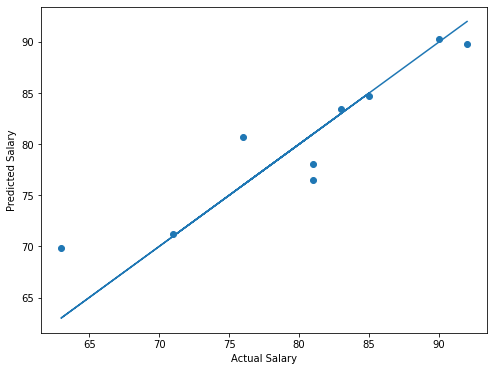

In [143]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

## 9. Documenting the finding


  - BaseBall case study dataset is too small. It contain only 30 records.
  - There is no duplicates present in dataset.
  - There is no null values are present in dataset.
  - Datatype is ok with respect to their column.
  - As we see, Runs is having a positive linear relationship with wins.
  - Little positive linear relationship between wins and double.
  - Triples has negative relationship with win.
  - HomeRuns per hit has a positive relation with wins.
  - Base on balls is having positive linear relationship with wins.
  - Stolen bases has a negative relation with wins.
  - Runs Allowed has negative linear relationship with wins.
  - Earned Runs has a negative relationship with wins.
  - Earned Runs average is having negative relationship with wins.
  - shutouts has a positive relatinship with wins.
  - Save has a positive ralationship with win.
  - The double has won maximum at 292 and double has minimum won in the 274.
  - Triples 30 has maximum wins and triples 37 has minimum wins.
  - Homeruns per hits is high with respect to win at the 137 followed by 140, 171, and 139.
  - At the hits of 1480 has highest runs and at the hits 1361 has lowest runs.
  - Hits and runs is having positive linear relationship.
  - There is little relationship between double and triples.
  - Upto 3.6 Earned Runs Average, all CG are equally distributed.
  - In this complete gane 4 has a maximum wins and their runs also maximum followed by cg 4.
  - complete game 1 has maximum count followed by 2 and 7.
  - CG 1 has maximium 22.8% chance to won the game then CG 2, and CG 3.
  - Runs also have a linear relation with HomeRuns.
  - It is observed that Save, Base on Balls and Shutouts have the highest positive correlation with Wins, while Earned Run Average, Runs Allowed and Earned Runs have the highest negative correlation with Wins.
  -  R, H, CG, and E are having some skewness.
  - MultiCollinearity exists ERA, ER, RA, H and AB features, Based on ANOVA F scores.
  - Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It has least difference between accuracy score and cross validation score.
  - After Hyperparameter tuning got 86.02% accuracy.

### 10. Model Save

In [241]:
import joblib
joblib.dump(rf,"baseball_case_study.pkl")

['baseball_case_study.pkl']

### Loading The Model

In [242]:
mod=joblib.load("baseball_case_study.pkl")

In [245]:
print(mod.predict(x))

[91.785      83.13142857 76.49797619 73.60628571 74.83930952 87.70283333
 76.78883333 85.56878571 77.32447619 85.02302381 83.08757143 84.55214286
 81.73297619 72.54180952 94.43866667 95.0985     93.24297619 70.63416667
 67.01478571 90.57740476 82.0442619  69.17133333 71.75164286 69.46
 89.78630952 81.7402381  79.94028571 74.018      73.65378571]


In [246]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,91.785000,95
1,83.131429,83
2,76.497976,81
3,73.606286,76
4,74.839310,74
6,87.702833,87
7,76.788833,81
8,85.568786,80
9,77.324476,78
10,85.023024,88
